In [1]:
# Add the dependencies.
import pandas as pd
import os
from sqlalchemy import create_engine, func
from config import DATABASE_URI
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from tensorflow.keras import metrics
#from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Download data from POSTGRES TABLES JOINNED/UNION
select * from junk1;

select jj.idd,jj.f1,jj.f2
INTO newjunk
FROM junk as jj
union
select jj1.idd,jj1.f1,jj1.f2
FROM junk1 as jj1;

select * from newjunk;

select * 
INTO COMBEC
FROM ec1
UNION
select *
FROM ec2
UNION
select *
FROM ec3;

In [2]:
#import sqlalchemy
#get data from postgres
#combined the multiple data sets from three different runs into one in postgres using SQL
engine = create_engine(DATABASE_URI)
CS_df = pd.read_sql_table(
    'combec',
    con=engine
)
CS_df.head()

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1
0,C2,17,0.0645,100.0,100.0,55.0,False,400.0,0.0,0.0,0.0,85.0,10.0,1.54 - 9.28j,0.0
1,C2,123,0.0645,100.0,100.0,55.0,False,400.0,0.0,0.0,0.0,85.0,10.0,1.54 - 9.28j,0.0
2,C2,232,0.0645,100.0,100.0,55.0,False,400.0,0.0,0.0,0.0,85.0,10.0,1.54 - 9.28j,0.0
3,C2,346,0.0645,100.0,100.0,55.0,False,400.0,0.0,0.0,0.0,85.0,10.0,1.54 - 9.28j,0.0
4,C2,454,0.0645,100.0,100.0,55.0,False,400.0,0.0,0.0,0.0,85.0,10.0,1.54 - 9.28j,0.0


In [3]:
CS_df.to_csv('alldata.csv')

In [4]:
temp1_df = CS_df[CS_df['o_o'] == True]  #filter for valid rows
temp1_df['pw1_Diff'] = temp1_df['pw1'].diff()  #compute roe to row diff for power to see transitions
temp1_df['index1'] = temp1_df.index   #keep index for reference and merge
temp1_df.head()

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1
67,C2,7343,0.0645,100.0,100.0,55.0,True,0.0,0.0,85.0,10.0,85.0,10.0,1.54 - 9.28j,0.0,NaN,67
68,C2,7452,0.0645,100.0,100.0,55.0,True,0.0,0.0,85.0,10.0,85.0,10.0,1.54 - 9.28j,0.0,0.0,68
69,C2,7565,0.0645,100.0,100.0,55.0,True,0.0,0.0,85.0,10.0,85.0,10.0,1.54 - 9.28j,0.0,0.0,69
70,C2,7674,0.0645,100.0,100.0,55.0,True,0.0,0.0,85.0,10.0,85.0,10.0,1.54 - 9.28j,0.0,0.0,70
71,C2,7780,0.0645,100.0,100.0,55.0,True,0.0,0.0,85.0,10.0,85.0,10.0,1.54 - 9.28j,0.0,0.0,71


In [5]:
#Filter rows that meet stablization criteria to compute transition time
temp2_df = temp1_df[(temp1_df['pw1'] > 0) & \
                    ((temp1_df['re'] > temp1_df['pw1']*0.02 )|(temp1_df['re'] == 0)) & (temp1_df['pr1'] > 0.017)]
temp2_df.tail()

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1
99569,C4,3129286,0.0189,25.1,60.2,55.0,True,800.0,201.032,85.0,10.0,29.3,32.1,9.11 - 66.1j,418.8,0.0,99569
99570,C4,3129396,0.0189,25.1,60.2,55.0,True,800.0,166.332,85.0,10.0,51.7,25.5,9.11 - 66.1j,418.8,0.0,99570
99571,C4,3129506,0.0189,25.1,60.2,55.0,True,800.0,166.332,85.0,10.0,51.7,25.5,3.64 - 63.8j,980.0,0.0,99571
99572,C4,3129618,0.0189,25.1,60.2,55.0,True,800.0,51.552,85.0,10.0,51.7,25.5,3.64 - 63.8j,980.0,0.0,99572
99573,C4,3129725,0.0189,25.1,60.2,55.0,True,800.0,51.552,85.0,10.0,62.9,23.9,3.64 - 63.8j,980.0,0.0,99573


In [6]:
#see jump in index shift to extract each run and corelate time associated with run
temp2_df['index1_Diff'] = temp2_df['index1'] - temp2_df['index1'].shift(-1)
temp2_df.tail()

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff
99569,C4,3129286,0.0189,25.1,60.2,55.0,True,800.0,201.032,85.0,10.0,29.3,32.1,9.11 - 66.1j,418.8,0.0,99569,-1.0
99570,C4,3129396,0.0189,25.1,60.2,55.0,True,800.0,166.332,85.0,10.0,51.7,25.5,9.11 - 66.1j,418.8,0.0,99570,-1.0
99571,C4,3129506,0.0189,25.1,60.2,55.0,True,800.0,166.332,85.0,10.0,51.7,25.5,3.64 - 63.8j,980.0,0.0,99571,-1.0
99572,C4,3129618,0.0189,25.1,60.2,55.0,True,800.0,51.552,85.0,10.0,51.7,25.5,3.64 - 63.8j,980.0,0.0,99572,-1.0
99573,C4,3129725,0.0189,25.1,60.2,55.0,True,800.0,51.552,85.0,10.0,62.9,23.9,3.64 - 63.8j,980.0,0.0,99573,NaN


In [7]:
#filter and clean unwanted and potentially runs that went "bad"
temp3_df = temp2_df[((temp2_df['pw1_Diff'] > 0) & (temp2_df['index1_Diff'] == -1))|(temp2_df['index1_Diff'] <-4) ]
temp3_df.tail()

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff
99369,C4,3107411,0.0189,25.0,60.0,55.0,True,800.0,200.756,65.0,20.0,65.0,20.0,2.75 - 51.0j,131.39,800.0,99369,-1.0
99383,C4,3108948,0.0190,25.0,60.0,55.0,True,800.0,41.384,65.0,20.0,61.4,24.2,2.74 - 61.7j,1117.60,0.0,99383,-77.0
99460,C4,3117367,0.0189,25.0,60.0,55.0,True,800.0,200.484,75.0,15.0,74.3,15.1,2.05 - 34.7j,0.00,800.0,99460,-1.0
99477,C4,3119229,0.0190,25.0,60.0,55.0,True,800.0,55.220,75.0,15.0,59.9,23.9,3.10 - 61.7j,1036.40,0.0,99477,-75.0
99552,C4,3127428,0.0189,25.0,60.0,55.0,True,800.0,201.032,85.0,10.0,85.0,10.0,1.54 - 9.28j,131.39,800.0,99552,-1.0


In [8]:
#compute transition time
temp3_df['time'] = temp3_df['t1'].diff()
temp3_df.tail()

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time
99369,C4,3107411,0.0189,25.0,60.0,55.0,True,800.0,200.756,65.0,20.0,65.0,20.0,2.75 - 51.0j,131.39,800.0,99369,-1.0,9402.0
99383,C4,3108948,0.0190,25.0,60.0,55.0,True,800.0,41.384,65.0,20.0,61.4,24.2,2.74 - 61.7j,1117.60,0.0,99383,-77.0,1537.0
99460,C4,3117367,0.0189,25.0,60.0,55.0,True,800.0,200.484,75.0,15.0,74.3,15.1,2.05 - 34.7j,0.00,800.0,99460,-1.0,8419.0
99477,C4,3119229,0.0190,25.0,60.0,55.0,True,800.0,55.220,75.0,15.0,59.9,23.9,3.10 - 61.7j,1036.40,0.0,99477,-75.0,1862.0
99552,C4,3127428,0.0189,25.0,60.0,55.0,True,800.0,201.032,85.0,10.0,85.0,10.0,1.54 - 9.28j,131.39,800.0,99552,-1.0,8199.0


In [9]:
temp3_df.drop(temp3_df.tail(1).index,inplace=True) # drop last row as there is no transition
temp3_df.tail()

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time
99283,C4,3098009,0.0189,25.0,60.0,55.0,True,800.0,22.672,55.0,25.0,63.3,23.9,2.63 - 61.7j,1129.19,0.0,99283,-86.0,766.0
99369,C4,3107411,0.0189,25.0,60.0,55.0,True,800.0,200.756,65.0,20.0,65.0,20.0,2.75 - 51.0j,131.39,800.0,99369,-1.0,9402.0
99383,C4,3108948,0.0190,25.0,60.0,55.0,True,800.0,41.384,65.0,20.0,61.4,24.2,2.74 - 61.7j,1117.60,0.0,99383,-77.0,1537.0
99460,C4,3117367,0.0189,25.0,60.0,55.0,True,800.0,200.484,75.0,15.0,74.3,15.1,2.05 - 34.7j,0.00,800.0,99460,-1.0,8419.0
99477,C4,3119229,0.0190,25.0,60.0,55.0,True,800.0,55.220,75.0,15.0,59.9,23.9,3.10 - 61.7j,1036.40,0.0,99477,-75.0,1862.0


In [10]:
#final cleanup , select only thos were stabilliztion has been achieved
temp4_df = temp3_df[(temp3_df['index1_Diff'] < -1 ) & (temp3_df['pw1_Diff'] ==0 )]
temp4_df.head()

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time
215,C2,23529,0.0643,100.0,100.0,55.0,True,100.0,4.060,85.0,10.0,58.2,20.7,5.65 - 53.4j,124.6,0.0,215,-79.0,1088.0
302,C2,33270,0.0644,100.0,100.0,55.0,True,100.0,3.396,75.0,15.0,59.9,20.4,2.87 - 51.5j,125.6,0.0,302,-83.0,875.0
487,C2,53501,0.0641,100.0,100.0,55.0,True,100.0,5.204,55.0,25.0,66.8,20.2,2.53 - 51.6j,123.4,0.0,487,-81.0,1092.0
579,C2,63565,0.0646,100.0,100.0,55.0,True,100.0,7.220,45.0,30.0,48.6,21.1,4.20 - 51.3j,129.2,0.0,579,-81.0,1205.0
671,C2,73624,0.0647,100.0,100.0,55.0,True,100.0,2.724,35.0,35.0,71.8,19.8,2.31 - 51.8j,123.2,0.0,671,-80.0,1200.0


In [13]:
#choose columns of interest
columns = ['idd','pr1','f1','f2','f3','pw1','re','x1','x2','x1r','x2r','a1','time']
temp41_df = temp4_df[columns]

In [14]:
#save transition time file
temp41_df.to_csv('transitiontime.csv')

In [11]:
temp4_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 215 to 99477
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idd          835 non-null    object 
 1   t1           835 non-null    int64  
 2   pr1          835 non-null    float64
 3   f1           835 non-null    float64
 4   f2           835 non-null    float64
 5   f3           835 non-null    float64
 6   o_o          835 non-null    bool   
 7   pw1          835 non-null    float64
 8   re           835 non-null    float64
 9   x1           835 non-null    float64
 10  x2           835 non-null    float64
 11  x1r          835 non-null    float64
 12  x2r          835 non-null    float64
 13  z            835 non-null    object 
 14  a1           835 non-null    float64
 15  pw1_Diff     835 non-null    float64
 16  index1       835 non-null    int64  
 17  index1_Diff  835 non-null    float64
 18  time         835 non-null    float64
dtypes: b

In [12]:
#get ready for ML model
columnx = ['pr1','pw1','time']
columny = ['x1','x2']

In [13]:
Select input /output space, normalize
X = temp4_df[columnx].values
y = temp4_df[columny].values
for i in range(len(y)):
    y[i] =[y[i][0]/100,y[i][1]/100]

In [14]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [15]:
len(X_test)


209

In [16]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  20
hidden_nodes_layer2 = 10

n1 = tf.keras.models.Sequential()

# First hidden layer
n1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
n1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
n1.add(tf.keras.layers.Dense(units=2))

# Check the structure of the model
n1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 312
Trainable params: 312
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
n1.compile(loss='mse', optimizer="adam",metrics=["mse"])
# Train the model
fit_model = n1.fit(X_train_scaled,y_train,batch_size= 50,epochs=30)

# Evaluate the model using the test data
model_loss, model_accuracy = n1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, accuracy: {1-model_accuracy}")

Epoch 1/30
13/13 [==============================] - 0s 1ms/step - loss: 0.1365 - mse: 0.1365
Epoch 2/30
13/13 [==============================] - 0s 1ms/step - loss: 0.0836 - mse: 0.0836
Epoch 3/30
13/13 [==============================] - 0s 2ms/step - loss: 0.0560 - mse: 0.0560
Epoch 4/30
13/13 [==============================] - 0s 1ms/step - loss: 0.0461 - mse: 0.0461
Epoch 5/30
13/13 [==============================] - 0s 2ms/step - loss: 0.0404 - mse: 0.0404
Epoch 6/30
13/13 [==============================] - 0s 2ms/step - loss: 0.0361 - mse: 0.0361
Epoch 7/30
13/13 [==============================] - 0s 2ms/step - loss: 0.0333 - mse: 0.0333
Epoch 8/30
13/13 [==============================] - 0s 1ms/step - loss: 0.0309 - mse: 0.0309
Epoch 9/30
13/13 [==============================] - 0s 2ms/step - loss: 0.0292 - mse: 0.0292
Epoch 10/30
13/13 [==============================] - 0s 2ms/step - loss: 0.0276 - mse: 0.0276
Epoch 11/30
13/13 [==============================] - 0s 2ms/step - lo

In [19]:
X_scaled = X_scaler.transform(X)

In [20]:
output = n1.predict(X_scaled)

In [21]:
#reconstruct output 
temp4_df["P1"] = [i[0]*100 for i in output]
temp4_df["P2"] = [i[1]*100 for i in output]
result_df = temp4_df[['x1','x2','P1','P2']]
result_df.head(30)

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,x1,x2,P1,P2
215,85.0,10.0,61.606622,26.057926
302,75.0,15.0,54.190493,26.073101
487,55.0,25.0,61.691612,26.028427
579,45.0,30.0,65.535557,26.055804
671,35.0,35.0,65.394121,26.071671
759,25.0,40.0,54.586101,26.144680
851,35.0,35.0,58.355659,26.123649
945,45.0,30.0,65.394121,26.071671
1035,55.0,25.0,61.789906,26.127174
1218,75.0,15.0,58.148277,26.140293


In [22]:
#save model
n1.save("oct19.h5")

In [23]:
# Import the model to a new object
n1_imported = tf.keras.models.load_model('oct19.h5')

In [24]:
output1 = n1_imported.predict(X_scaled)

In [25]:
temp4_df["P11"] = [i[0]*100 for i in output1]
temp4_df["P22"] = [i[1]*100 for i in output1]
result_df = temp4_df[['x1','x2','P11','P22']]
result_df.head(30)

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,x1,x2,P11,P22
215,85.0,10.0,61.606622,26.057926
302,75.0,15.0,54.190493,26.073101
487,55.0,25.0,61.691612,26.028427
579,45.0,30.0,65.535557,26.055804
671,35.0,35.0,65.394121,26.071671
759,25.0,40.0,54.586101,26.144680
851,35.0,35.0,58.355659,26.123649
945,45.0,30.0,65.394121,26.071671
1035,55.0,25.0,61.789906,26.127174
1218,75.0,15.0,58.148277,26.140293


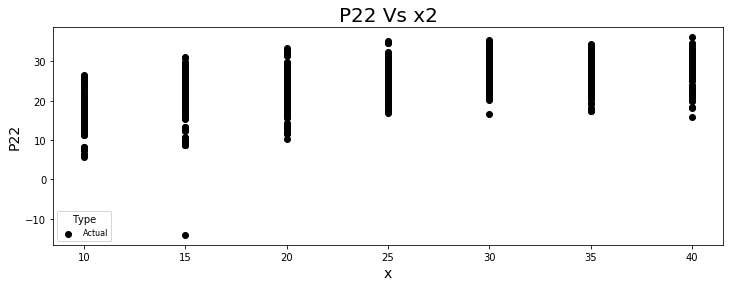

In [26]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(result_df["x2"],y=result_df["P22"],color='black',label='Actual')

ax.set_title('P22 Vs x2',fontsize=20)
ax.set_ylabel('P22',fontsize=14)
ax.set_xlabel('x',fontsize=14)
ax.legend(loc="lower left",title="Type",fontsize="8")
def onclick(event):
    print( 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f'%(
        event.button, event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [27]:
#data to test the model. This contains the expected output (time). Alternate rows are blank row in excel
test_df = pd.read_csv("testhp.csv")
test_df

,Unnamed: 0,pr1,pw1,time
0,0.0,0.0235,250.0,1500.0
1,NaN,NaN,NaN,NaN
2,1.0,0.0235,500.0,1000.0
3,NaN,NaN,NaN,NaN
4,2.0,0.0235,750.0,800.0
5,NaN,NaN,NaN,NaN
6,3.0,0.0235,750.0,600.0
7,NaN,NaN,NaN,NaN
8,4.0,0.0235,500.0,600.0
9,NaN,NaN,NaN,NaN


In [28]:
test_df.columns

Index(['Unnamed: 0', 'pr1', 'pw1', 'time'], dtype='object')

In [29]:
Xt = test_df[columnx].values
X_test_scaled = X_scaler.transform(Xt)

In [30]:
test_output = n1.predict(X_test_scaled)

In [31]:
#code to ensure output does not get out of range for machine input
for i in range(len(test_output)):
    if test_output[i][0] > 0.9 :
        test_output[i][0] = 0.85
    if test_output[i][1] < 0.1 :
        test_output[i][1] = 0.1    
        

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


In [32]:
test_df["P11"] = [i[0]*100 for i in test_output]
test_df["P22"] = [i[1]*100 for i in test_output]
test_df 

,Unnamed: 0,pr1,pw1,time,P11,P22
0,0.0,0.0235,250.0,1500.0,62.006795,16.280735
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0235,500.0,1000.0,48.487800,30.967346
3,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,0.0235,750.0,800.0,48.642716,30.761600
5,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,0.0235,750.0,600.0,51.892984,29.885209
7,NaN,NaN,NaN,NaN,NaN,NaN
8,4.0,0.0235,500.0,600.0,55.110425,31.664795
9,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#create excel with inputs needed for the next run on the tool
test_df.to_csv("test_results2.csv",header=True)